In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# print(city.head())
# print(ride.head())

# Combine the data into a single dataset
data = pd.merge(ride, city, how="left", on="city")

# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

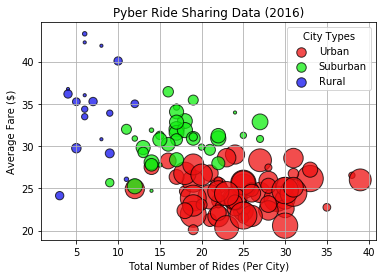

In [2]:
# Get the types of cities 
types_of_cities = data["type"].unique()
# print(types_of_cities)

# Create dataframes for each city type
def create_city_dataframe(list_of_types):
    dataframes = []
    for city in list_of_types:
        dataframe = data.loc[data["type"] == city]
        dataframes.append(dataframe)
    return dataframes

city_dataframes = create_city_dataframe(types_of_cities)

# List of colors to use for the scatterplot
colors = ["#EE1111", "#11EE11", "#1111EE"]


# Calculate fares (y-axis), total rides (x-axis) and drivers (marker size) for each city
for i in np.arange(len(city_dataframes)):
    # print(city_dataframes[i])
    fares = city_dataframes[i].groupby(["city"]).mean()["fare"]
    # print(fares)
    total_rides = city_dataframes[i].groupby(["city"]).count()["ride_id"]
    # print(total_rides)
    drivers = city_dataframes[i].groupby(["city"]).mean()["driver_count"]
    # print(drivers)
    
    # Create scatter plots for each type of city
    plt.scatter(total_rides, fares, marker="o", facecolor=colors[i], edgecolor="black", 
               s=drivers * 10, alpha=0.75, label=types_of_cities[i])
    
    
# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
legend = plt.legend(title=("City Types"))

for i in np.arange(len(types_of_cities)):
    legend.legendHandles[i]._sizes = [90]

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Images/fares_and_rides_by_city.png")   

## Total Fares by City Type

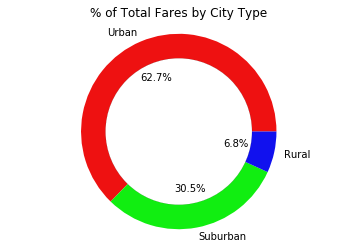

In [3]:
# Calculate Type Percents
fare_percents = (data.groupby("type").sum()["fare"] / data["fare"].sum() * 100).sort_values(ascending=False)
# print(fare_percents)

# Build Pie Chart
labels = fare_percents.index.values.tolist()
explode = [0.1, 0, 0]

plt.pie(fare_percents, labels=labels, colors=colors, autopct="%1.1f%%")

center_circle = plt.Circle((0,0), 0.75, color="black", fc="white", linewidth=0.1)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/percent_of_fares.png") 

## Total Rides by City Type

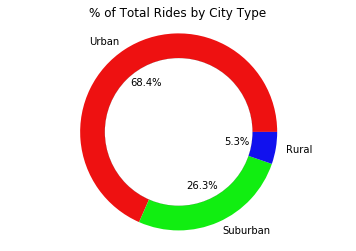

In [4]:
# Calculate Ride Percents
total_rides = data.groupby("type").count()["ride_id"].sort_values(ascending=False)
# print(total_rides)
    
# Build Pie Chart
plt.pie(total_rides, colors=colors, labels=labels, autopct="%1.1f%%")

center_circle = plt.Circle((0,0), 0.75, color="black", fc="white", linewidth=0.1)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/rides_by_city_type.png")

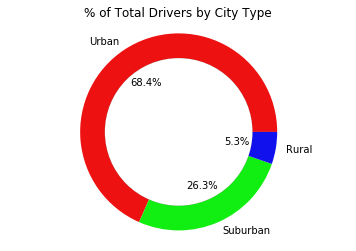

In [5]:
# Calculate Driver Percents
drivers = data.groupby(["type"])["driver_count"].count().sort_values(ascending=False)
# print(drivers)

# Build Pie Charts
plt.pie(drivers, labels=labels, colors=colors,
       autopct="%1.1f%%")

center_circle = plt.Circle((0,0), 0.75, color="black", fc="white", linewidth=0.1)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis("equal")

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/total_drivers_by_city_type.png")